<a href="https://colab.research.google.com/github/Junseokee/Deep_Learning/blob/main/220830_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Skin Cancer MNIST

## 파일 업로드

In [1]:
# 기본 라이브러리 import
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#os.environ을 이용하여 Kaggle API 세팅
os.environ['KAGGLE_USERNAME'] = 'junseokee'
os.environ['KAGGLE_KEY'] = '700d85d8d7f11484367ea21d45aa2bee'

In [3]:
# 데이터 다운로드 하는 명령
import zipfile
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip '*.zip'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: ham10000_images_

### 파일당 데이터 갯수 확인

In [4]:
# 베이스 디렉토리 설정
base_dir = '/content/'
train_dir1 = os.path.join(base_dir, 'HAM10000_images_part_1')
train_dir2 = os.path.join(base_dir, 'HAM10000_images_part_2')
train_dir3 = os.path.join(base_dir, 'ham10000_images_part_1')
train_dir4 = os.path.join(base_dir, 'ham10000_images_part_2')

In [5]:
train_fnames1 = os.listdir(train_dir1)
train_fnames2 = os.listdir(train_dir2)
train_fnames3 = os.listdir(train_dir3)
train_fnames4 = os.listdir(train_dir4)

In [6]:
# 파일별 이미지 갯수
print(len(train_fnames1))
print(len(train_fnames2))
print(len(train_fnames3))
print(len(train_fnames4))

5000
5015
5000
5015


In [7]:
# 데이터 프레임 확인
df = pd.read_csv('/content/HAM10000_metadata.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [9]:
# 결측치 확인
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [10]:
df['dx'].value_counts() # 라벨값 수치 확인

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

Text(0.5, 1.0, 'Class Count')

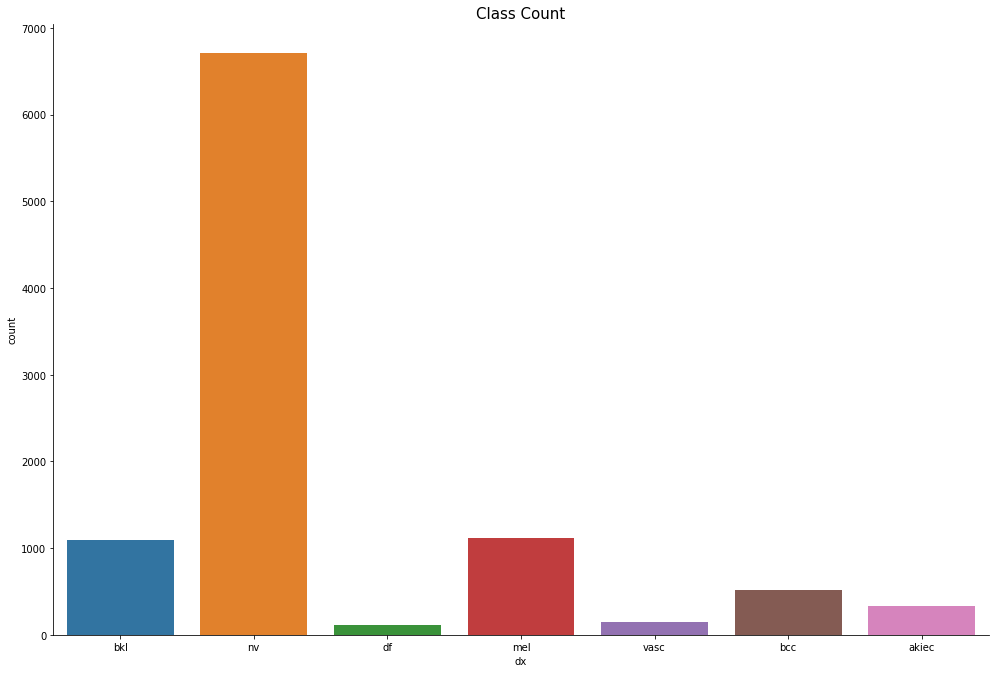

In [11]:
# 라벨값 수치 시각화 nv가 많은 비율을 차지함
a = sns.catplot(data=df, x='dx',kind='count')
a.fig.set_size_inches(16,10)
a.ax.set_title('Class Count', fontsize= 15)

## 데이터와 라벨 분리

In [12]:
# RGB 파일 업로드
data_dir = '/content/hmnist_28_28_RGB.csv'
rgbdf = pd.read_csv(data_dir)

In [13]:
rgbdf.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [14]:
#데이터와 라벨값과 분리 RGB파일은 픽셀값과 라벨값이 저장된 데이터

x = rgbdf.drop(columns=['label'], axis=1)
y = rgbdf['label']
x = x.to_numpy()
x = x.reshape(-1,28,28,3)

In [15]:
xx = rgbdf.drop(columns=['label'], axis=1)
y = rgbdf['label']
xx = xx.to_numpy()
xx.reshape(-1,28,28,3)

array([[[[192, 153, 193],
         [195, 155, 192],
         [197, 154, 185],
         ...,
         [193, 144, 153],
         [197, 154, 163],
         [194, 152, 160]],

        [[197, 162, 202],
         [201, 160, 197],
         [202, 160, 193],
         ...,
         [194, 147, 149],
         [198, 158, 166],
         [192, 153, 167]],

        [[197, 155, 193],
         [198, 154, 185],
         [202, 156, 191],
         ...,
         [194, 149, 152],
         [199, 161, 177],
         [194, 156, 175]],

        ...,

        [[194, 157, 191],
         [206, 173, 206],
         [206, 165, 192],
         ...,
         [191, 155, 183],
         [193, 159, 187],
         [193, 163, 197]],

        [[187, 154, 185],
         [203, 171, 199],
         [202, 161, 183],
         ...,
         [178, 131, 148],
         [187, 152, 174],
         [190, 159, 189]],

        [[171, 136, 164],
         [191, 153, 179],
         [196, 155, 176],
         ...,
         [173, 124, 138],
        

In [16]:
# # 이미지 리사이징 --> 실패
# import os
# import glob
# from PIL import Image

# files = glob.glob('/content/ham10000_images_part_1/*.jpg')

# for f in files:
#     img = Image.open(f)
#     img_resize = img.resize(244, 244)
#     title, ext = os.path.splitext(f)
#     img_resize.save(title + ext)

In [17]:
# x 리사이징, y 카테고리화
from tensorflow.keras.utils import to_categorical

x = x/255
y=to_categorical(y)

In [18]:
# 사이즈 확인
print(x.shape,"\n",y.shape)

(10015, 28, 28, 3) 
 (10015, 7)


In [19]:
# 라벨값
label={
    ' Actinic keratoses':0,
    'Basal cell carcinoma':1,
    'Benign keratosis-like lesions':2,
    'Dermatofibroma':3,
    'Melanocytic nevi':4,
    'Melanoma':6,
    'Vascular lesions':5
}

[0. 0. 1. 0. 0. 0. 0.]


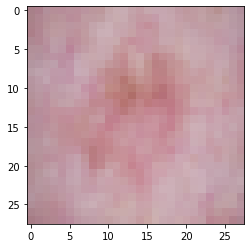

In [20]:
# 이미지 샘플
plt.imshow(x[500])
print(y[500])

TypeError: ignored

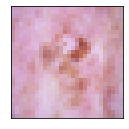

In [21]:
# 이미지 샘플 시각화

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(234)

class_names = [' Actinic keratoses','Basal cell carcinoma',
    'Benign keratosis-like lesions','Dermatofibroma',
    'Melanocytic nevi','Melanoma','Vascular lesions']
sample_size = 9
random_idx = np.random.randint(10000, size=sample_size)
plt.figure(figsize = (7,7))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x[i])
  plt.xlabel(class_names[int(y[i])])
plt.show()

In [22]:
# Train Test 데이터셋 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2, random_state=333)

In [23]:
print(f'x_train.shape: {x_train.shape}, x_test.shape : {x_test.shape}')
print(f'y_train.shape: {y_train.shape}, y_test.shape : {y_test.shape}')

x_train.shape: (8012, 28, 28, 3), x_test.shape : (2003, 28, 28, 3)
y_train.shape: (8012, 7), y_test.shape : (2003, 7)


In [24]:
# 데이터 증식
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#---------------------------- 이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip = True,
                                   vertical_flip = True,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')
train_datagen.fit(x_train)

In [25]:
# 모델 정의

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (28, 28, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 1024, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 256)       73984     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 256)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 512)         1

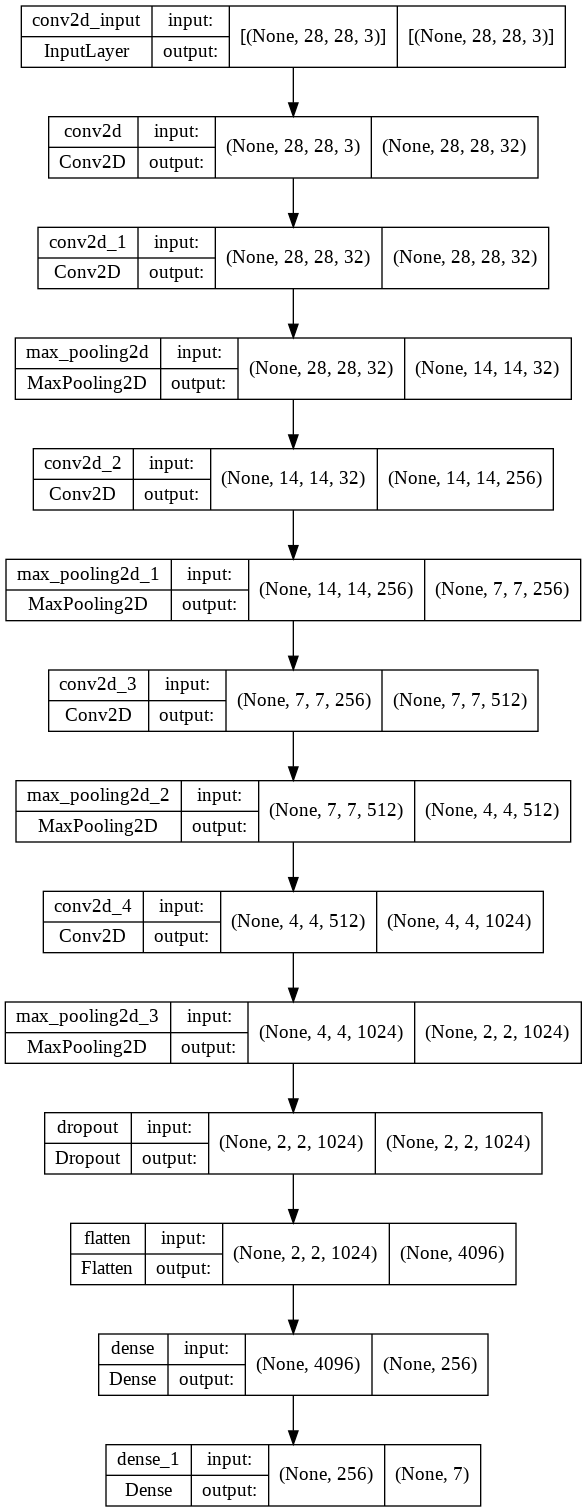

In [26]:
# 모델 시각화
from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes =True)

In [27]:
# 콜백 정의

from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_acc', patience=7,verbose=1)
mc = ModelCheckpoint('best_mask_model.h5',
                     monitor='val_acc',
                     verbose=2, save_best_only = True)

In [28]:
# 모델 학습

history = model.fit(x_train,y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[es,mc])

Epoch 1/100
126/126 [==============================] - ETA: 0s - loss: 1.0999 - acc: 0.6694
Epoch 1: val_acc improved from -inf to 0.66101, saving model to best_mask_model.h5
126/126 [==============================] - 14s 19ms/step - loss: 1.0999 - acc: 0.6694 - val_loss: 1.0137 - val_acc: 0.6610
Epoch 2/100
123/126 [============================>.] - ETA: 0s - loss: 0.9552 - acc: 0.6730
Epoch 2: val_acc improved from 0.66101 to 0.67049, saving model to best_mask_model.h5
126/126 [==============================] - 2s 16ms/step - loss: 0.9549 - acc: 0.6724 - val_loss: 0.9004 - val_acc: 0.6705
Epoch 3/100
122/126 [============================>.] - ETA: 0s - loss: 0.8718 - acc: 0.6848
Epoch 3: val_acc improved from 0.67049 to 0.68597, saving model to best_mask_model.h5
126/126 [==============================] - 2s 16ms/step - loss: 0.8731 - acc: 0.6847 - val_loss: 0.8562 - val_acc: 0.6860
Epoch 4/100
123/126 [============================>.] - ETA: 0s - loss: 0.8502 - acc: 0.6925
Epoch 4: v

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

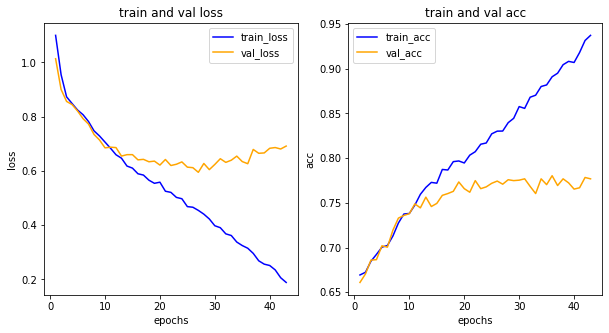

In [29]:
# 학습결과 시각화

import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

## 디렉토리 설정, 파일 통합

In [30]:
# 베이스 디렉토리 설정
base_dir = '/content/'
train_dir1 = os.path.join(base_dir, 'HAM10000_images_part_1')
train_dir2 = os.path.join(base_dir, 'HAM10000_images_part_2')

In [31]:
train_fnames1 = os.listdir(train_dir1)
train_fnames2 = os.listdir(train_dir2)

In [32]:
sum_dir = 'sum'
os.mkdir(sum_dir)

In [33]:
import shutil # 파일 및 디렉토리 작업을 수행하는데 사용하기 위한 모듈 import
import os

file_1 = '/content/HAM10000_images_part_1'
file_2 = '/content/HAM10000_images_part_2'

sumfile = '/content/sum/'

get_files1 = os.listdir(file_1)
get_files2 = os.listdir(file_2)

for i in get_files1:
  shutil.move(file_1+'/'+i,sumfile)

for j in get_files2:
  shutil.move(file_2+'/'+j,sumfile)

In [34]:
files = os.listdir(sumfile)

len(files)

10015

## 경로를 통해 데이터프레임과 이미지 결합 이미지 확인

In [35]:
# 데이터 경로 설정
DATA_PATH = "/content/"

In [36]:
# 라벨 확인
import numpy as np
import pandas as pd
df = pd.read_csv(DATA_PATH+'HAM10000_metadata.csv')
df['image_id'] = DATA_PATH +'sum/I'+ df['image_id'].apply(lambda x: str(x).replace('\\','/')[1:])+".jpg"

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,/content/sum/ISIC_0027419.jpg,bkl,histo,80.0,male,scalp
1,HAM_0000118,/content/sum/ISIC_0025030.jpg,bkl,histo,80.0,male,scalp
2,HAM_0002730,/content/sum/ISIC_0026769.jpg,bkl,histo,80.0,male,scalp
3,HAM_0002730,/content/sum/ISIC_0025661.jpg,bkl,histo,80.0,male,scalp
4,HAM_0001466,/content/sum/ISIC_0031633.jpg,bkl,histo,75.0,male,ear


In [37]:
df['image_id'][0]

'/content/sum/ISIC_0027419.jpg'

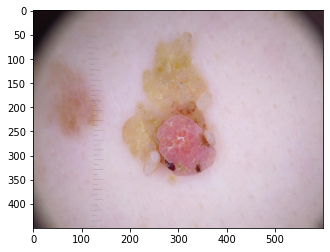

In [38]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread(df.iloc[10]['image_id'])
plt.imshow(img)

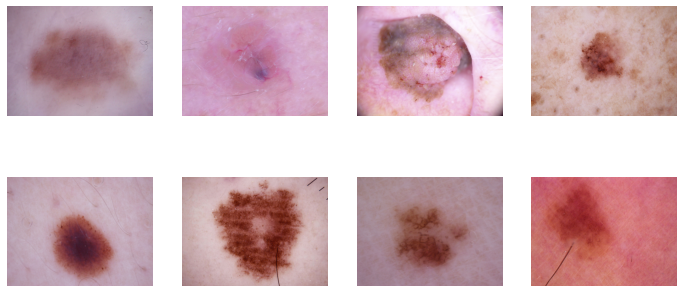

In [41]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4,4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8
next_cat_pix = [os.path.join(sumfile, fname) for fname in \
                files[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

### 라벨값 확인

In [42]:
# 라벨df = df.replace({'열 이름' : 기존 값}, 변경 값) 
dx = df['dx'].value_counts().sort_index()
print(dx)

akiec     327
bcc       514
bkl      1099
df        115
mel      1113
nv       6705
vasc      142
Name: dx, dtype: int64


In [ ]:
# label_mapping ={
#     0:'nv',
#     ''
# }

In [92]:
rdx = df.replace({'dx' : 'akiec'},0 )
rdx = rdx.replace({'dx' : 'bcc'},1 )
rdx = rdx.replace({'dx' : 'bkl'},2 )
rdx = rdx.replace({'dx' : 'df'},3 )
rdx = rdx.replace({'dx' : 'mel'},4 )
rdx = rdx.replace({'dx' : 'nv'},5 )
rdx = rdx.replace({'dx' : 'vasc'},6 )

rdx

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,/content/sum/ISIC_0027419.jpg,2,histo,80.0,male,scalp
1,HAM_0000118,/content/sum/ISIC_0025030.jpg,2,histo,80.0,male,scalp
2,HAM_0002730,/content/sum/ISIC_0026769.jpg,2,histo,80.0,male,scalp
3,HAM_0002730,/content/sum/ISIC_0025661.jpg,2,histo,80.0,male,scalp
4,HAM_0001466,/content/sum/ISIC_0031633.jpg,2,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,/content/sum/ISIC_0033084.jpg,0,histo,40.0,male,abdomen
10011,HAM_0002867,/content/sum/ISIC_0033550.jpg,0,histo,40.0,male,abdomen
10012,HAM_0002867,/content/sum/ISIC_0033536.jpg,0,histo,40.0,male,abdomen
10013,HAM_0000239,/content/sum/ISIC_0032854.jpg,0,histo,80.0,male,face


In [43]:
# 라벨별 갯수
categories = dx.index.values
print(categories)

counts = dx.values
print(counts)

['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']
[ 327  514 1099  115 1113 6705  142]


In [86]:
categories

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype=object)

## Train, Validation, Test 세트 분리

In [44]:
from sklearn.model_selection import train_test_split
# train test val 분리
df_train, df_tmp = train_test_split(df, test_size=0.4, stratify=df['dx'])
df_val, df_test = train_test_split(df_tmp, test_size=0.5)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(6009, 7)
(2003, 7)
(2003, 7)


### ImageDataGenerator 적용

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

target_size = (224,224)
batch_size = 32

# Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe = df_train,
    directory=None,
    x_col = 'image_id',
    y_col = 'dx',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',    
    shuffle=True,
    seed=42,
    class_mode='categorical')

Found 6009 validated image filenames belonging to 7 classes.


In [46]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe = df_val,
    directory=None,
    x_col = 'image_id',
    y_col = 'dx',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',    
    shuffle=False,
    seed=42,
    class_mode='categorical')

Found 2003 validated image filenames belonging to 7 classes.


In [47]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe = df_test,
    directory=None,
    x_col = 'image_id',
    y_col = None,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',    
    shuffle=False,
    seed=42,
    class_mode=None)

Found 2003 validated image filenames.


In [48]:
# 콜백 정의

from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_acc', patience=7,verbose=1)
mc = ModelCheckpoint('best_mask_model.h5',
                     monitor='val_acc',
                     verbose=2, save_best_only = True)

## 전이학습

In [49]:
# 전이학습 모델 설치
import tensorflow.keras.applications
!pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 583.4 MB 9.9 kB/s 
     |████████████████████████████████| 439 kB 92.3 MB/s 
     |████████████████████████████████| 1.7 MB 68.2 MB/s 
     |████████████████████████████████| 5.9 MB 67.8 MB/s 
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3


In [51]:
# 모델 옵션 값
import tensorflow as tf
import tensorflow.keras.applications.convnext
Xcep =  tf.keras.applications.convnext.ConvNeXtTiny(
    model_name='convnext_tiny',
    include_top=True,
    include_preprocessing=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

114745344/114735104 [==============================] - 1s 0us/step


In [52]:
Xcep.summary()

Model: "convnext_tiny"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_tiny_prestem_normaliz  (None, 224, 224, 3)  0          ['input_1[0][0]']                
 ation (Normalization)                                                                            
                                                                                                  
 convnext_tiny_stem (Sequential  (None, 56, 56, 96)  4896        ['convnext_tiny_prestem_normaliza
 )                                                               tion[0][0]']         

In [53]:
!pip install -q efficientnet

     |████████████████████████████████| 50 kB 3.1 MB/s 


In [54]:
# 모델 정의
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(weights = 'imagenet',
              input_shape = (224,224, 3), include_top = False)
vgg16.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [56]:
# 전이학습 학습
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7, activation = 'softmax'))


model.compile(optimizer = Adam(1e-4),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(train_generator,
                    epochs = 20,
                    validation_data = valid_generator,
                    callbacks=[es,mc])

Epoch 1/20
188/188 [==============================] - ETA: 0s - loss: 0.8654 - acc: 0.7307
Epoch 1: val_acc did not improve from 0.75537
188/188 [==============================] - 126s 665ms/step - loss: 0.8654 - acc: 0.7307 - val_loss: 0.8828 - val_acc: 0.7324
Epoch 2/20
188/188 [==============================] - ETA: 0s - loss: 0.6879 - acc: 0.7702
Epoch 2: val_acc did not improve from 0.75537
188/188 [==============================] - 124s 660ms/step - loss: 0.6879 - acc: 0.7702 - val_loss: 0.8185 - val_acc: 0.7544
Epoch 3/20
188/188 [==============================] - ETA: 0s - loss: 0.6180 - acc: 0.7828
Epoch 3: val_acc did not improve from 0.75537
188/188 [==============================] - 125s 665ms/step - loss: 0.6180 - acc: 0.7828 - val_loss: 0.7818 - val_acc: 0.7444
Epoch 4/20
188/188 [==============================] - ETA: 0s - loss: 0.5988 - acc: 0.7838
Epoch 4: val_acc improved from 0.75537 to 0.75936, saving model to best_mask_model.h5
188/188 [============================

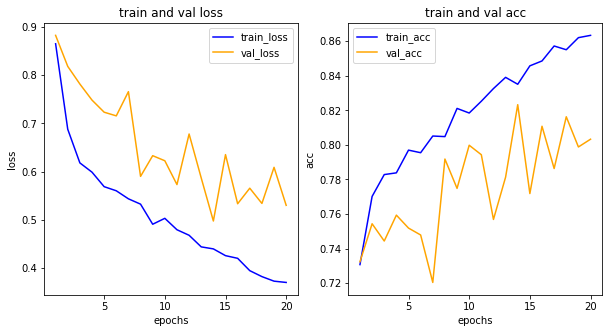

In [57]:
# 학습결과 시각화

import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

In [59]:
model.save('vgg16model.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

In [60]:
preds = model.predict(test_generator,
                      verbose = 1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - 26s 406ms/step


In [94]:
rdx['dx']

0        2
1        2
2        2
3        2
4        2
        ..
10010    0
10011    0
10012    0
10013    0
10014    4
Name: dx, Length: 10015, dtype: int64

In [61]:
preds.shape

(2003, 7)

In [62]:
prob = zip(df['dx'], list(preds[1]))
prob

In [63]:
sorted(list(prob), key = lambda z: z[1], reverse = True)

[('bkl', 0.9841966),
 ('bkl', 0.011798617),
 ('bkl', 0.0019040767),
 ('bkl', 0.00080519874),
 ('bkl', 0.0007720205),
 ('bkl', 0.0004844237),
 ('bkl', 3.9073064e-05)]

In [78]:
pred = model.evaluate(valid_generator)

63/63 [==============================] - 19s 302ms/step - loss: 0.5299 - acc: 0.8033


In [95]:
test_pred = model.predict(test_generator)
test_pred

array([[2.0955816e-02, 6.9060439e-04, 3.6249813e-03, ..., 5.9802383e-01,
        3.7501734e-01, 5.1600119e-04],
       [7.7202049e-04, 1.9040767e-03, 3.9073064e-05, ..., 1.1798617e-02,
        9.8419660e-01, 8.0519874e-04],
       [4.1631800e-03, 9.5961336e-03, 3.7658950e-03, ..., 1.9344583e-03,
        9.4707692e-01, 3.5920495e-03],
       ...,
       [9.3814764e-05, 6.7207257e-05, 2.6894226e-05, ..., 1.0219980e-04,
        9.9941146e-01, 6.6904206e-05],
       [4.2659923e-02, 7.0815673e-03, 1.3976766e-01, ..., 8.4141001e-02,
        7.1399617e-01, 4.6061305e-04],
       [9.1804974e-03, 3.9551286e-03, 4.7522359e-02, ..., 4.3263217e-03,
        7.9367542e-01, 1.0562279e-02]], dtype=float32)

In [98]:
test_pred.shape

(2003, 7)

In [ ]:
rdx = df.replace({'dx' : 'akiec'},0 )
rdx = rdx.replace({'dx' : 'bcc'},1 )
rdx = rdx.replace({'dx' : 'bkl'},2 )
rdx = rdx.replace({'dx' : 'df'},3 )
rdx = rdx.replace({'dx' : 'mel'},4 )
rdx = rdx.replace({'dx' : 'nv'},5 )
rdx = rdx.replace({'dx' : 'vasc'},6 )


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# 혼동 행렬을 만듭니다.
results = model.predict(valid_generator)
plt.figure(figsize = (8,8))
cm = confusion_matrix(np.argmax(rdx, axis = -1), # argmax
                       np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            yticklabels = label_name,
            xticklabels = label_name)
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('True label', fontsize = 15)
plt.show()

In [ ]:
print('\n', classification_report(np.argmax(preds, axis = -1),
                                  np.argmax(Y_true, axis = -1)))